In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [2]:
fake_news = pd.read_csv('Data/ISOT/Fake.csv')

In [3]:
fake_news

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
true_news = pd.read_csv('Data/ISOT/True.csv')

In [5]:
true_news

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [6]:
# Ajouter une colonne pour la classe
true_news["label"] = "true"
fake_news["label"] = "fake"

# Fusionner les datasets
df = pd.concat([true_news, fake_news], ignore_index=True)

In [7]:
# Séparer les features (textes) et labels
df = df.sample(frac=1).reset_index(drop=True)  # Mélanger les données
X = df["text"]  # Remplace "text" par le nom correct de la colonne
y = df["label"]

# Diviser en train/test
test_size = 0.2  # 80% entraînement, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Entraînement du modèle Naïve Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

Accuracy: 0.9269

Classification Report:
              precision    recall  f1-score   support

        fake       0.93      0.94      0.93      4696
        true       0.93      0.92      0.92      4284

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



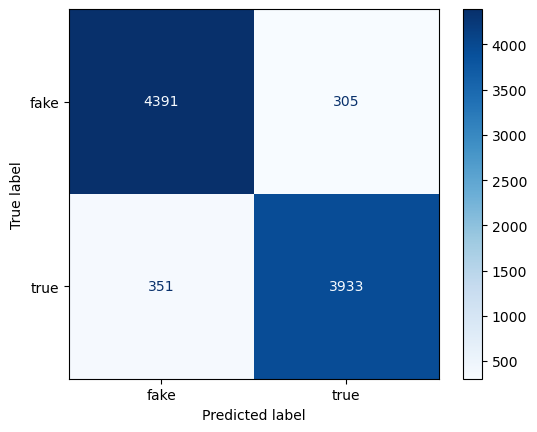

In [8]:
# Prédictions
y_pred = model.predict(X_test_tfidf)

# Évaluation des performances
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Affichage de la matrice de confusion
ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test, cmap='Blues')
plt.show()


In [9]:
file_path = "Data/Kaggle/fake_or_real_news.csv"  # Remplace par le chemin correct si nécessaire
data = pd.read_csv(file_path)
data['label'] = data['label'].map({'REAL': 'true', 'FAKE': 'fake'})


In [10]:
data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",fake
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,fake
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,true
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",fake
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,true
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,true
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,fake
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,fake
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",true


In [11]:
X = data["text"]
y = data["label"]

In [12]:
X = vectorizer.transform(X)

In [13]:
y_pred = model.predict(X)

In [14]:
y_pred

array(['fake', 'fake', 'true', ..., 'fake', 'true', 'fake'],
      shape=(6335,), dtype='<U4')

In [15]:
y

0       fake
1       fake
2       true
3       fake
4       true
        ... 
6330    true
6331    fake
6332    fake
6333    true
6334    true
Name: label, Length: 6335, dtype: object

Accuracy: 0.5438

Classification Report:
              precision    recall  f1-score   support

        fake       0.53      0.80      0.64      3164
        true       0.59      0.28      0.38      3171

    accuracy                           0.54      6335
   macro avg       0.56      0.54      0.51      6335
weighted avg       0.56      0.54      0.51      6335



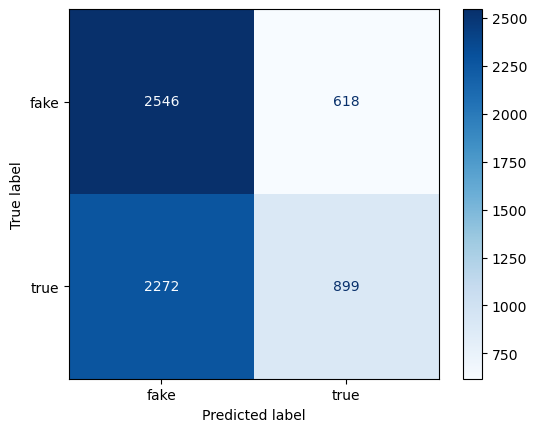

In [17]:

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y, y_pred))

# Affichage de la matrice de confusion
ConfusionMatrixDisplay.from_estimator(model, X, y, cmap='Blues')
plt.show()
